<h2>Imports</h2>

In [40]:
from pymatgen import Structure
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from IPython.display import HTML, display, Image
from matplotlib import pyplot as plt
import numpy as np
from scipy import constants

from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure

<h2>Téléchargement de la structure de bandes électroniques du KNa2Sb</h2>

Structure de bandes électroniques du KNa2Sb : 


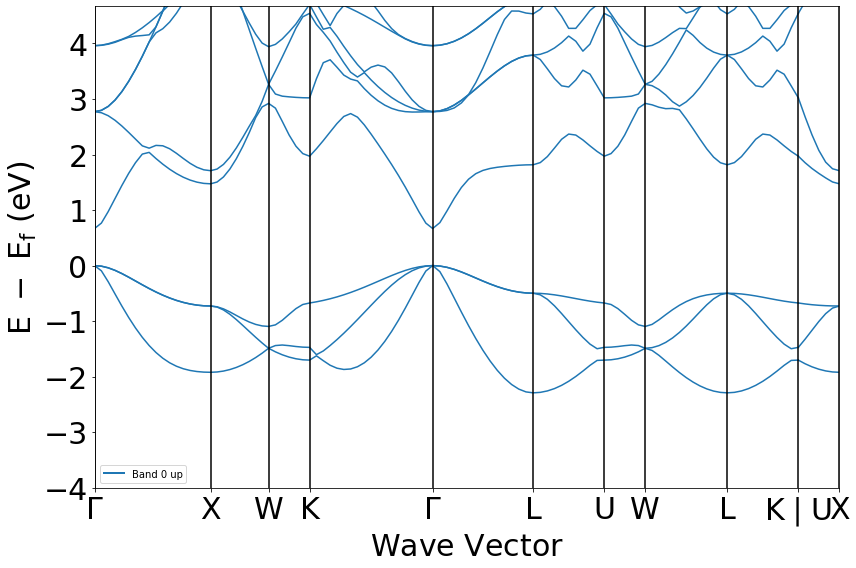

In [41]:
with MPRester("toW9wacOwhTywK26") as m:

    # Structure de bande sur base de notre id de matériau : 
    bandStructure = m.get_bandstructure_by_material_id("mp-15724")

# Et pour afficher la structure de bandes électroniques :
print("Structure de bandes électroniques du KNa2Sb : ")

bsPlot = BSPlotter(bandStructure)
bsPlot.show()

<h2>Détermination de la bande interdite</h2>

Structure de bandes électroniques du KNa2Sb avec sa bande interdite : 

Légende : 

Turquoise : bande interdite
Vert : maxima de la bande de valence
Rouge : minima de la bande de conduction


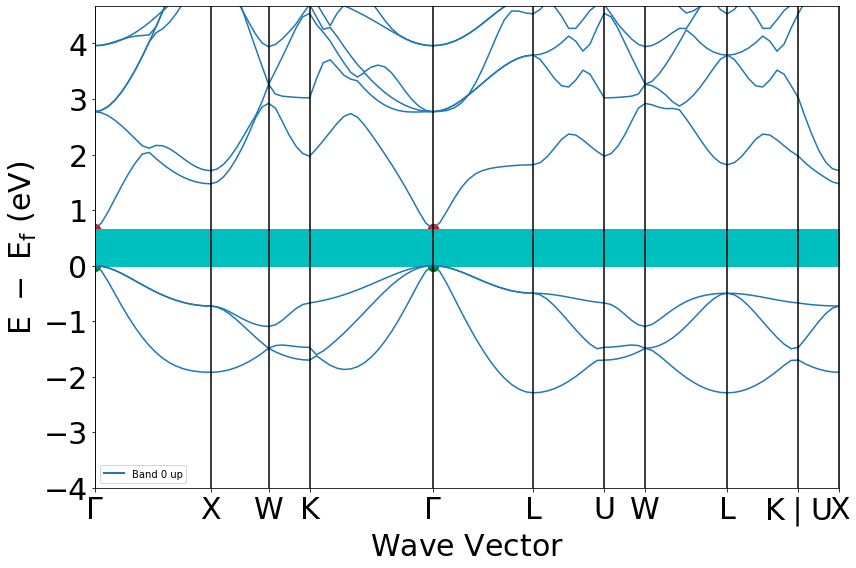

In [42]:
gap = bandStructure.get_band_gap()
energy = gap.get('energy') #énergie de la bande interdite

bsPlot.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True, smooth_tol=None)
plt.fill_between(np.linspace(0, bsPlot.bs_plot_data().get("ticks").get("distance")[-1], 500), 0, gap.get('energy'), color ='c')

print("Structure de bandes électroniques du KNa2Sb avec sa bande interdite : ")

print("\nLégende : ")

print("\nTurquoise : bande interdite")
print("Vert : maxima de la bande de valence")
print("Rouge : minima de la bande de conduction")

plt.show()

<h2>Caractéristiques de la bande interdite</h2>

In [43]:
print("Energie de la bande interdite : ", energy, "eV.")
print("Domaine de la bande interdite sur l'axe y (E - E_f) (en eV) : ", 0, " à ", energy, "eV.")

if gap.get('direct') == True:
    print('\nLa bande interdite est ici directe.')
else:
    print('\nLa bande interdite est ici indirecte.')

Energie de la bande interdite :  0.6677999999999997 eV.
Domaine de la bande interdite sur l'axe y (E - E_f) (en eV) :  0  à  0.6677999999999997 eV.

La bande interdite est ici directe.


<h2>Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion + figure indiquant la dispersion par des flèches</h2>

Index de la 1ère bande de conduction :  defaultdict(<class 'list'>, {<Spin.up: 1>: [14]})
Index de la dernière bande de valence :  defaultdict(<class 'list'>, {<Spin.up: 1>: [11, 12, 13]})

Dispersion max de la bande de valence entre U-W: -4.607434177521815

Dispersion min de la bande de valence entre W-L : -0.2912362129748829

Dispersion max de la bande de conduction entre L-K: -4.816248179187288

Dispersion min de la bande de conduction entre U-X : 0.9235946971181993


<function matplotlib.pyplot.show(close=None, block=None)>

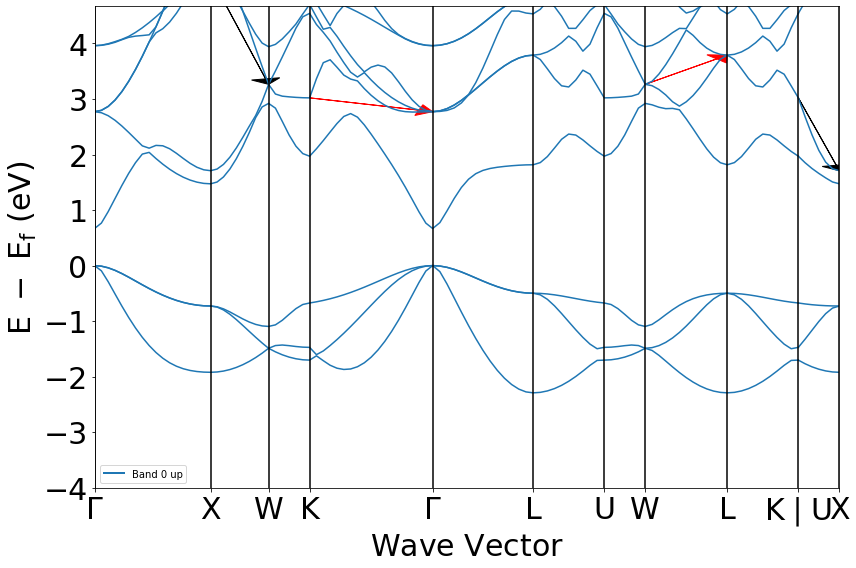

In [44]:
data = bsPlot.bs_plot_data()
ticks = data.get("ticks")
distance = ticks.get("distance")
energy2 = data.get("energy")

# BANDES DE VALENCE/CONDUCTION : 
#  1ère bande de conduction : 
cbm = bandStructure.get_cbm()
print("Index de la 1ère bande de conduction : ", cbm['band_index'])

#  Dernière bande de valence :
vbm = bandStructure.get_vbm()
print("Index de la dernière bande de valence : ", vbm['band_index'])


# DIFFERENCES SUR LES AXES : 
#  Axe des abscisses : 
deltaK=[]
indexDistance=[]
for i in range (len(distance)-1):
    if distance[i] != distance[i+1]:
        deltaK.append(distance[i+1]-distance[i])
        indexDistance.append(i)

#  Axe des ordonnées :
VDeltaE=[] #V pour valence
CDeltaE=[] #C pour conduction
for i in range (len(energy2.get('1'))):
    VDeltaE.append(energy2.get('1')[i][15][-1]-energy2.get('1')[i][15][0])
    CDeltaE.append(energy2.get('1')[i][16][-1]-energy2.get('1')[i][16][0])
#Chiffres 16 et 15 proviennent des index de la bande de conduction et de valence, respectivement.

# PENTES : 
VD = [] #Valence Dispersion
VAD = [] #Valence Absolute Dispersion 
CD = [] #Conduction Dispersion
CAD = [] #Conduction Absolute Dispersion
for i in range(len(deltaK)):
    VD.append(VDeltaE[i]/deltaK[i])
    VAD.append(abs(VD[i]))
    CD.append(CDeltaE[i]/deltaK[i])
    CAD.append(abs(CD[i]))
#print(VD, "|", VAD, "|", CD, "|", CAD)
#Les valeurs absolues permettent de comparer. 

## bande de valence : 
### pente max :
indexVMax= VAD.index(np.max(VAD))
VMax = VD[indexVMax]
print("\nDispersion max de la bande de valence entre U-W:",VMax)
#BIEN VERIFIER ENTRE QUOI ET QUOI !

### pente min :
indexVMin= VAD.index(np.min(VAD))
VMin = VD[indexVMin]
print("\nDispersion min de la bande de valence entre W-L :",VMin)

## bande de conduction : 
### pente max :
indexCMax= CAD.index(np.max(CAD))
CMax = CD[indexCMax]
print("\nDispersion max de la bande de conduction entre L-K:",CMax)
#BIEN VERIFIER ENTRE QUOI ET QUOI !

### pente min :
indexCMin= CAD.index(np.min(CAD))
CMin = CD[indexCMin]
print("\nDispersion min de la bande de conduction entre U-X :",CMin)

# Construction des flèches : 
bsPlot.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
plt.arrow(distance[indexDistance[indexVMax]],energy2.get('1')[indexVMax][15][0],deltaK[indexVMax],VDeltaE[indexVMax],color='black',head_width = 0.2, head_length = 0.1,length_includes_head=True)
plt.arrow(distance[indexDistance[indexCMax]],energy2.get('1')[indexCMax][16][0],deltaK[indexCMax],CDeltaE[indexCMax],color='black',head_width = 0.2,head_length = 0.1,length_includes_head=True)
plt.arrow(distance[indexDistance[indexVMin]],energy2.get('1')[indexVMin][15][0],deltaK[indexVMin],VDeltaE[indexVMin],color='red',head_width = 0.2,head_length = 0.1,length_includes_head=True)
plt.arrow(distance[indexDistance[indexCMin]],energy2.get('1')[indexCMin][16][0],deltaK[indexCMin],CDeltaE[indexCMin],color='red',head_width = 0.2,head_length = 0.1,length_includes_head=True)


plt.show

<h2>Calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique</h2>

In [45]:
print("Masse effective au sommet de la dernière bande de valence : \n")

# Position min bande valence
xV = distance[indexDistance[1]]

# Energie de référence (càd l'énergie max de la bande de valence)
yV = 0

print("Coordonnées de la base de la première bande de valence : ", "(" , xV, ",", yV, ")")

# Utilisations d'un point proche pour obtenir les constantes dans l'équation : 
xppV = distance[indexDistance[1]] - deltaK[0]/(len(energy2.get('1')[0][15])-1)
#xppV = 0.26
yppV = energy2.get('1')[1][15][-2]
#yppV = 0.01

aV = (yppV-yV)/(xppV-xV)**2 
bV = -2*xV*aV
cV = yV+aV*xV*xV


print("Coordonnées du point proche : ", "(", xppV, ",", yppV, ")")
print("Constantes de l'équation du second degré :", "a =", aV,"| b =", bV,"| c =", cV)

Masse effective au sommet de la dernière bande de valence : 

Coordonnées de la base de la première bande de valence :  ( 0.8051080126552617 , 0 )
Coordonnées du point proche :  ( 0.7577487177931874 , 2.9577 )
Constantes de l'équation du second degré : a = 1318.6928952219578 | b = -2123.3804323495274 | c = 854.7752999999991


Legende : 

Rose : Parabole
Orange : Point proche utilisé


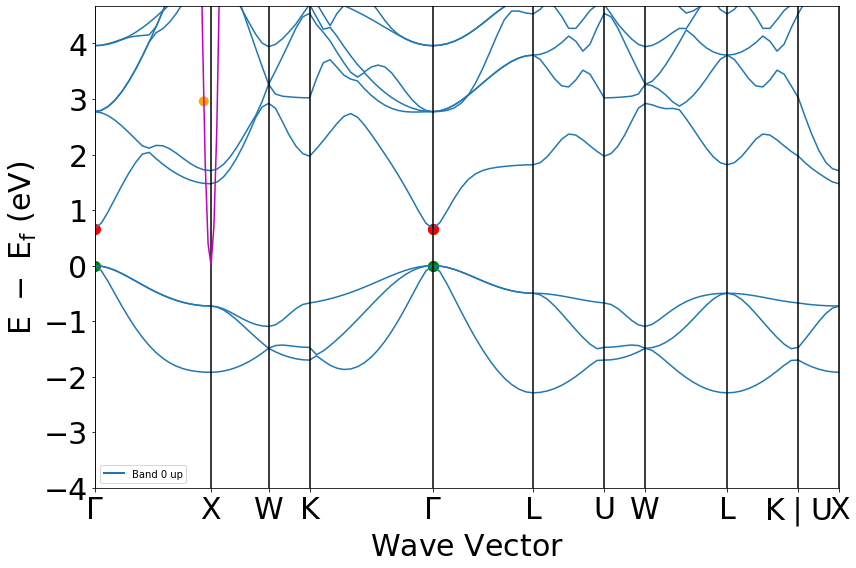

In [46]:
bsPlot.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True,smooth_tol=None)
polynomV = np.polynomial.polynomial.Polynomial([cV,bV,aV]) 
abscissesV = np.linspace(0,2,100)
ordonnéesV = np.zeros((100))
for i in range(0,100):
    ordonnéesV[i] = polynomV(abscissesV[i]) 
plt.scatter(xppV,yppV , c = "orange", s = 100, edgecolor = 'none', marker = 'o')
plt.plot(abscissesV, ordonnéesV, color="m")

print("Legende : \n")
print("Rose : Parabole")
print("Orange : Point proche utilisé")

In [47]:
print("Valeur de la masse effective : \n")

eV_J = 1.60218*10**(-19) #Conversion eV en Joule
Angstrom = 10**(-20) #Conversion des Angström^2 en m^2
hbar = constants.hbar #Constante de Planck

Vprime = 2*aV*eV_J*Angstrom
masse_effective_V = (hbar**2)/Vprime

print("Dérivée seconde du polynôme ax^2+bx+c, donnée par 2*a : ", 2*aV, " eV*A^2") 
print("Masse effective à la base de la bande de conduction : ", masse_effective_V, " kg")

Valeur de la masse effective : 

Dérivée seconde du polynôme ax^2+bx+c, donnée par 2*a :  2637.3857904439155  eV*A^2
Masse effective à la base de la bande de conduction :  2.6318876975086376e-33  kg


In [48]:
print("Masse effective à la base de la première bande de conduction : \n")

# Position min bande conduction
xC = distance[indexDistance[4]]

# Energie bande interdite (càd l'énergie minimale de la bande de conduction)
yC = energy

print("Coordonnées de la base de la première bande de conduction : ", "(" , xC, ",", yC, ")")

# Utilisations d'un point proche pour obtenir les constantes dans l'équation : 
xppC = distance[indexDistance[4]] - deltaK[3]/(len(energy2.get('1')[3][16])-1)
yppC = energy2.get('1')[4][16][-2]

aC = (yppC-yC)/(xppC-xC)**2 
bC = -2*xC*aC
cC = yC+aC*xC*xC


print("Coordonnées du point proche : ", "(", xppC, ",", yppC, ")")
print("Constantes de l'équation du second degré :", "a =", aC,"| b =", bC,"| c =", cC )

Masse effective à la base de la première bande de conduction : 

Coordonnées de la base de la première bande de conduction :  ( 2.346256689655238 , 0.6677999999999997 )
Coordonnées du point proche :  ( 2.29881524504389 , 3.7768999999999995 )
Constantes de l'équation du second degré : a = 1381.3981840536162 | b = -6482.22946082679 | c = 7605.154918172562


Parabole de la 1ère bande de conduction : 

Légende : 

Rose : Parabole
Orange : Point proche utilisé


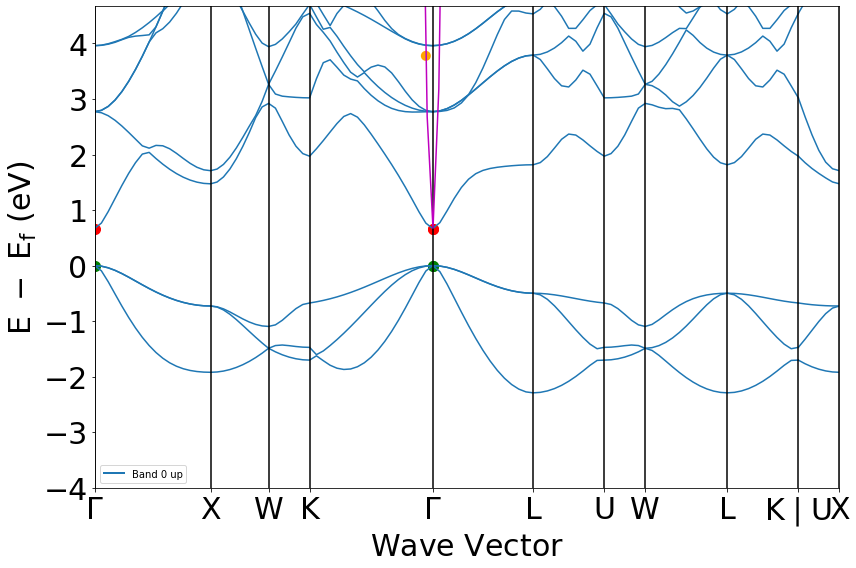

In [49]:
print("Parabole de la 1ère bande de conduction : \n")
print("Légende : \n")
print("Rose : Parabole")
print("Orange : Point proche utilisé")

polynomC = np.polynomial.polynomial.Polynomial([cC,bC,aC]) 
abscissesC = np.linspace(1.5,5.5,100)
ordonnéesC = np.zeros((100))
for i in range(0,100):
    ordonnéesC[i] = polynomC(abscissesC[i]) 
bsPlot.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True, smooth_tol=None)
plt.scatter(xppC,yppC , c = "orange", s = 100, edgecolor = 'none', marker = 'o')
plt.plot(abscissesC, ordonnéesC, color="m")

In [50]:
print("Valeur de la masse effective : \n")

eV_J = 1.60218*10**(-19) #Conversion eV en Joule
Angstrom = 10**(-20) #Conversion des Angström^2 en m^2
hbar = constants.hbar #Constante de Planck

Cprime = 2*aC*eV_J*Angstrom
masse_effective_C = (hbar**2)/Cprime

print("Dérivée seconde du polynôme ax^2+bx+c, donnée par 2*a : ", 2*aC, " eV*A^2") 
print("Masse effective à la base de la bande de conduction : ", masse_effective_C, " kg")

Valeur de la masse effective : 

Dérivée seconde du polynôme ax^2+bx+c, donnée par 2*a :  2762.7963681072324  eV*A^2
Masse effective à la base de la bande de conduction :  2.5124194079525524e-33  kg
